# CS 513 Final Project - NYPD Vehicle Stop Report Data

##### Imports

In [38]:
# Name: Steven Hoang and Jason Wong
# CWID: 10446170 and 10452057
# Assignment: Final Project
# Purpose: Analyze data regarding incoming connections on ports and determine if they pose a threat
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

#models imports
# Naive Bayes
from sklearn.naive_bayes import GaussianNB, CategoricalNB

# ANN (Artificial Neural Network)
from sklearn.neural_network import MLPClassifier

# KNN (K-Nearest Neighbors)
from sklearn.neighbors import KNeighborsClassifier

# CART (Classification and Regression Trees)
from sklearn.tree import DecisionTreeClassifier

# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Random Forest
from sklearn.ensemble import RandomForestClassifier

# SVM
from sklearn.svm import SVC

# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

# XGBoost
from xgboost import XGBClassifier

##### Reading Data

In [39]:
df = pd.read_csv('NYPD_Vehicle_Stop_Reports_20250430.csv')
df

,EVNT_KEY,OCCUR_DT,OCCUR_TM,CMD_CD,VEH_SEIZED_FLG,VEH_SEARCHED_FLG,VEH_SEARCH_CONSENT_FLG,VEH_CHECKPOINT_FLG,FORCE_USED_FLG,ARREST_MADE_FLG,SUMMON_ISSUED_FLG,VEH_CATEGORY,RPTED_AGE,SEX_CD,RACE_DESC,LATITUDE,LONGITUDE,X_COORD_CD,Y_COORD_CD
0,284650033,04/02/2024,07:04:00,1,False,False,(null),False,False,False,True,CAR/SUV,42,M,BLACK,40.722253,-74.005913,982611.0,202413.0
1,284650036,04/02/2024,08:56:00,5,False,False,(null),False,False,False,True,CAR/SUV,33,M,HISPANIC,40.718457,-73.994809,985689.0,201030.0
2,284650037,04/02/2024,07:48:00,5,False,False,(null),False,False,False,True,CAR/SUV,42,M,BLACK,40.718457,-73.994809,985689.0,201030.0
3,284650038,04/02/2024,04:55:00,7,False,False,(null),False,False,False,False,CAR/SUV,49,M,WHITE,40.715954,-73.986721,987931.0,200118.0
4,284650039,04/02/2024,07:10:00,7,False,False,(null),False,False,False,False,CAR/SUV,36,M,WHITE,40.715954,-73.986721,987931.0,200118.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677663,304404459,03/31/2025,16:15:00,83,False,False,(null),False,False,False,True,CAR/SUV,32,M,HISPANIC,0.000000,0.000000,1008705.0,193427.0
677664,304404690,03/31/2025,9:00:00,109,False,False,(null),False,False,False,False,CAR/SUV,46,M,ASIAN / PACIFIC ISLANDER,0.000000,0.000000,1031437.0,216900.0
677665,304404735,03/31/2025,17:30:00,110,False,False,(null),False,False,False,False,CAR/SUV,33,M,ASIAN / PACIFIC ISLANDER,40.757683,-73.844416,1027233.0,215480.0
677666,304424562,03/31/2025,23:24:00,47,False,False,(null),False,False,True,False,CAR/SUV,22,M,HISPANIC,40.893325,-73.860813,1022790.0,264806.0


## Data Manipulation & Cleaning

In [40]:
df_cleaned = df.copy()

df_cleaned = df_cleaned.rename(columns={
    'EVNT_KEY': 'event_id',
    'OCCUR_DT': 'stop_date',
    'OCCUR_TM': 'stop_time',
    'CMD_CD': 'command_code',
    'VEH_SEIZED_FLG': 'vehicle_seized',
    'VEH_SEARCHED_FLG': 'vehicle_searched',
    'VEH_SEARCH_CONSENT_FLG': 'search_consent',
    'VEH_CHECKPOINT_FLG': 'checkpoint_stop',
    'FORCE_USED_FLG': 'force_used',
    'ARREST_MADE_FLG': 'arrest_made',
    'SUMMON_ISSUED_FLG': 'summons_issued',
    'VEH_CATEGORY': 'vehicle_type',
    'RPTED_AGE': 'driver_age',
    'SEX_CD': 'driver_sex',
    'RACE_DESC': 'driver_race',
    'LATITUDE': 'latitude',
    'LONGITUDE': 'longitude',
    'X_COORD_CD': 'x_coord',
    'Y_COORD_CD': 'y_coord',
    'datetime': 'stop_datetime'
})

df_cleaned

,event_id,stop_date,stop_time,command_code,vehicle_seized,vehicle_searched,search_consent,checkpoint_stop,force_used,arrest_made,summons_issued,vehicle_type,driver_age,driver_sex,driver_race,latitude,longitude,x_coord,y_coord
0,284650033,04/02/2024,07:04:00,1,False,False,(null),False,False,False,True,CAR/SUV,42,M,BLACK,40.722253,-74.005913,982611.0,202413.0
1,284650036,04/02/2024,08:56:00,5,False,False,(null),False,False,False,True,CAR/SUV,33,M,HISPANIC,40.718457,-73.994809,985689.0,201030.0
2,284650037,04/02/2024,07:48:00,5,False,False,(null),False,False,False,True,CAR/SUV,42,M,BLACK,40.718457,-73.994809,985689.0,201030.0
3,284650038,04/02/2024,04:55:00,7,False,False,(null),False,False,False,False,CAR/SUV,49,M,WHITE,40.715954,-73.986721,987931.0,200118.0
4,284650039,04/02/2024,07:10:00,7,False,False,(null),False,False,False,False,CAR/SUV,36,M,WHITE,40.715954,-73.986721,987931.0,200118.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677663,304404459,03/31/2025,16:15:00,83,False,False,(null),False,False,False,True,CAR/SUV,32,M,HISPANIC,0.000000,0.000000,1008705.0,193427.0
677664,304404690,03/31/2025,9:00:00,109,False,False,(null),False,False,False,False,CAR/SUV,46,M,ASIAN / PACIFIC ISLANDER,0.000000,0.000000,1031437.0,216900.0
677665,304404735,03/31/2025,17:30:00,110,False,False,(null),False,False,False,False,CAR/SUV,33,M,ASIAN / PACIFIC ISLANDER,40.757683,-73.844416,1027233.0,215480.0
677666,304424562,03/31/2025,23:24:00,47,False,False,(null),False,False,True,False,CAR/SUV,22,M,HISPANIC,40.893325,-73.860813,1022790.0,264806.0


In [41]:
# Combine stop_date and stop_time into a datetime column
df_cleaned['stop_datetime'] = pd.to_datetime(df_cleaned['stop_date'] + ' ' + df_cleaned['stop_time'], errors='coerce')

# Extract parts of the date
df_cleaned['stop_dayofweek'] = df_cleaned['stop_datetime'].dt.day_name()
df_cleaned['stop_month'] = df_cleaned['stop_datetime'].dt.month
df_cleaned['stop_year'] = df_cleaned['stop_datetime'].dt.year

# Map months to seasons (Northern Hemisphere)
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df_cleaned['stop_season'] = df_cleaned['stop_month'].apply(get_season)

df_cleaned

,event_id,stop_date,stop_time,command_code,vehicle_seized,vehicle_searched,search_consent,checkpoint_stop,force_used,arrest_made,...,driver_race,latitude,longitude,x_coord,y_coord,stop_datetime,stop_dayofweek,stop_month,stop_year,stop_season
0,284650033,04/02/2024,07:04:00,1,False,False,(null),False,False,False,...,BLACK,40.722253,-74.005913,982611.0,202413.0,2024-04-02 07:04:00,Tuesday,4,2024,Spring
1,284650036,04/02/2024,08:56:00,5,False,False,(null),False,False,False,...,HISPANIC,40.718457,-73.994809,985689.0,201030.0,2024-04-02 08:56:00,Tuesday,4,2024,Spring
2,284650037,04/02/2024,07:48:00,5,False,False,(null),False,False,False,...,BLACK,40.718457,-73.994809,985689.0,201030.0,2024-04-02 07:48:00,Tuesday,4,2024,Spring
3,284650038,04/02/2024,04:55:00,7,False,False,(null),False,False,False,...,WHITE,40.715954,-73.986721,987931.0,200118.0,2024-04-02 04:55:00,Tuesday,4,2024,Spring
4,284650039,04/02/2024,07:10:00,7,False,False,(null),False,False,False,...,WHITE,40.715954,-73.986721,987931.0,200118.0,2024-04-02 07:10:00,Tuesday,4,2024,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677663,304404459,03/31/2025,16:15:00,83,False,False,(null),False,False,False,...,HISPANIC,0.000000,0.000000,1008705.0,193427.0,2025-03-31 16:15:00,Monday,3,2025,Spring
677664,304404690,03/31/2025,9:00:00,109,False,False,(null),False,False,False,...,ASIAN / PACIFIC ISLANDER,0.000000,0.000000,1031437.0,216900.0,2025-03-31 09:00:00,Monday,3,2025,Spring
677665,304404735,03/31/2025,17:30:00,110,False,False,(null),False,False,False,...,ASIAN / PACIFIC ISLANDER,40.757683,-73.844416,1027233.0,215480.0,2025-03-31 17:30:00,Monday,3,2025,Spring
677666,304424562,03/31/2025,23:24:00,47,False,False,(null),False,False,True,...,HISPANIC,40.893325,-73.860813,1022790.0,264806.0,2025-03-31 23:24:00,Monday,3,2025,Spring


In [42]:
# Extract hour from stop_datetime
df_cleaned['stop_hour'] = df_cleaned['stop_datetime'].dt.hour

# Categorize time of day
def get_time_of_day(hour):
    if hour >= 0 and hour < 6:
        return 'Late Night'
    elif hour < 12:
        return 'Morning'
    elif hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

df_cleaned['stop_time_of_day'] = df_cleaned['stop_hour'].apply(get_time_of_day)
df_cleaned


,event_id,stop_date,stop_time,command_code,vehicle_seized,vehicle_searched,search_consent,checkpoint_stop,force_used,arrest_made,...,longitude,x_coord,y_coord,stop_datetime,stop_dayofweek,stop_month,stop_year,stop_season,stop_hour,stop_time_of_day
0,284650033,04/02/2024,07:04:00,1,False,False,(null),False,False,False,...,-74.005913,982611.0,202413.0,2024-04-02 07:04:00,Tuesday,4,2024,Spring,7,Morning
1,284650036,04/02/2024,08:56:00,5,False,False,(null),False,False,False,...,-73.994809,985689.0,201030.0,2024-04-02 08:56:00,Tuesday,4,2024,Spring,8,Morning
2,284650037,04/02/2024,07:48:00,5,False,False,(null),False,False,False,...,-73.994809,985689.0,201030.0,2024-04-02 07:48:00,Tuesday,4,2024,Spring,7,Morning
3,284650038,04/02/2024,04:55:00,7,False,False,(null),False,False,False,...,-73.986721,987931.0,200118.0,2024-04-02 04:55:00,Tuesday,4,2024,Spring,4,Late Night
4,284650039,04/02/2024,07:10:00,7,False,False,(null),False,False,False,...,-73.986721,987931.0,200118.0,2024-04-02 07:10:00,Tuesday,4,2024,Spring,7,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677663,304404459,03/31/2025,16:15:00,83,False,False,(null),False,False,False,...,0.000000,1008705.0,193427.0,2025-03-31 16:15:00,Monday,3,2025,Spring,16,Afternoon
677664,304404690,03/31/2025,9:00:00,109,False,False,(null),False,False,False,...,0.000000,1031437.0,216900.0,2025-03-31 09:00:00,Monday,3,2025,Spring,9,Morning
677665,304404735,03/31/2025,17:30:00,110,False,False,(null),False,False,False,...,-73.844416,1027233.0,215480.0,2025-03-31 17:30:00,Monday,3,2025,Spring,17,Afternoon
677666,304424562,03/31/2025,23:24:00,47,False,False,(null),False,False,True,...,-73.860813,1022790.0,264806.0,2025-03-31 23:24:00,Monday,3,2025,Spring,23,Evening


In [43]:
# Convert command_code to string type
df_cleaned['command_code'] = df_cleaned['command_code'].astype(str)

# Show unique values and type confirmation
df_cleaned['command_code'].unique()[:10], df_cleaned['command_code'].dtype
df_cleaned


,event_id,stop_date,stop_time,command_code,vehicle_seized,vehicle_searched,search_consent,checkpoint_stop,force_used,arrest_made,...,longitude,x_coord,y_coord,stop_datetime,stop_dayofweek,stop_month,stop_year,stop_season,stop_hour,stop_time_of_day
0,284650033,04/02/2024,07:04:00,1,False,False,(null),False,False,False,...,-74.005913,982611.0,202413.0,2024-04-02 07:04:00,Tuesday,4,2024,Spring,7,Morning
1,284650036,04/02/2024,08:56:00,5,False,False,(null),False,False,False,...,-73.994809,985689.0,201030.0,2024-04-02 08:56:00,Tuesday,4,2024,Spring,8,Morning
2,284650037,04/02/2024,07:48:00,5,False,False,(null),False,False,False,...,-73.994809,985689.0,201030.0,2024-04-02 07:48:00,Tuesday,4,2024,Spring,7,Morning
3,284650038,04/02/2024,04:55:00,7,False,False,(null),False,False,False,...,-73.986721,987931.0,200118.0,2024-04-02 04:55:00,Tuesday,4,2024,Spring,4,Late Night
4,284650039,04/02/2024,07:10:00,7,False,False,(null),False,False,False,...,-73.986721,987931.0,200118.0,2024-04-02 07:10:00,Tuesday,4,2024,Spring,7,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677663,304404459,03/31/2025,16:15:00,83,False,False,(null),False,False,False,...,0.000000,1008705.0,193427.0,2025-03-31 16:15:00,Monday,3,2025,Spring,16,Afternoon
677664,304404690,03/31/2025,9:00:00,109,False,False,(null),False,False,False,...,0.000000,1031437.0,216900.0,2025-03-31 09:00:00,Monday,3,2025,Spring,9,Morning
677665,304404735,03/31/2025,17:30:00,110,False,False,(null),False,False,False,...,-73.844416,1027233.0,215480.0,2025-03-31 17:30:00,Monday,3,2025,Spring,17,Afternoon
677666,304424562,03/31/2025,23:24:00,47,False,False,(null),False,False,True,...,-73.860813,1022790.0,264806.0,2025-03-31 23:24:00,Monday,3,2025,Spring,23,Evening


In [44]:
df_cleaned['search_consent'] = df_cleaned['search_consent'].replace({'(null)': None})
df_cleaned['search_consent'] = df_cleaned['search_consent'].map({
    'Y': 'CONSENTED',
    'N': 'DENIED'
}).fillna('UNKNOWN')

df_cleaned

,event_id,stop_date,stop_time,command_code,vehicle_seized,vehicle_searched,search_consent,checkpoint_stop,force_used,arrest_made,...,longitude,x_coord,y_coord,stop_datetime,stop_dayofweek,stop_month,stop_year,stop_season,stop_hour,stop_time_of_day
0,284650033,04/02/2024,07:04:00,1,False,False,UNKNOWN,False,False,False,...,-74.005913,982611.0,202413.0,2024-04-02 07:04:00,Tuesday,4,2024,Spring,7,Morning
1,284650036,04/02/2024,08:56:00,5,False,False,UNKNOWN,False,False,False,...,-73.994809,985689.0,201030.0,2024-04-02 08:56:00,Tuesday,4,2024,Spring,8,Morning
2,284650037,04/02/2024,07:48:00,5,False,False,UNKNOWN,False,False,False,...,-73.994809,985689.0,201030.0,2024-04-02 07:48:00,Tuesday,4,2024,Spring,7,Morning
3,284650038,04/02/2024,04:55:00,7,False,False,UNKNOWN,False,False,False,...,-73.986721,987931.0,200118.0,2024-04-02 04:55:00,Tuesday,4,2024,Spring,4,Late Night
4,284650039,04/02/2024,07:10:00,7,False,False,UNKNOWN,False,False,False,...,-73.986721,987931.0,200118.0,2024-04-02 07:10:00,Tuesday,4,2024,Spring,7,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677663,304404459,03/31/2025,16:15:00,83,False,False,UNKNOWN,False,False,False,...,0.000000,1008705.0,193427.0,2025-03-31 16:15:00,Monday,3,2025,Spring,16,Afternoon
677664,304404690,03/31/2025,9:00:00,109,False,False,UNKNOWN,False,False,False,...,0.000000,1031437.0,216900.0,2025-03-31 09:00:00,Monday,3,2025,Spring,9,Morning
677665,304404735,03/31/2025,17:30:00,110,False,False,UNKNOWN,False,False,False,...,-73.844416,1027233.0,215480.0,2025-03-31 17:30:00,Monday,3,2025,Spring,17,Afternoon
677666,304424562,03/31/2025,23:24:00,47,False,False,UNKNOWN,False,False,True,...,-73.860813,1022790.0,264806.0,2025-03-31 23:24:00,Monday,3,2025,Spring,23,Evening


In [45]:
df_cleaned['vehicle_type'].unique()

array(['CAR/SUV', 'TLC', 'TRUCK/BUS', 'MCL', 'OTHER', 'BIKE', '(null)'],
      dtype=object)

In [46]:
df_cleaned['vehicle_type'] = df_cleaned['vehicle_type'].replace({'(null)': 'UNKNOWN'})
df_cleaned['vehicle_type'].unique()
df_cleaned

,event_id,stop_date,stop_time,command_code,vehicle_seized,vehicle_searched,search_consent,checkpoint_stop,force_used,arrest_made,...,longitude,x_coord,y_coord,stop_datetime,stop_dayofweek,stop_month,stop_year,stop_season,stop_hour,stop_time_of_day
0,284650033,04/02/2024,07:04:00,1,False,False,UNKNOWN,False,False,False,...,-74.005913,982611.0,202413.0,2024-04-02 07:04:00,Tuesday,4,2024,Spring,7,Morning
1,284650036,04/02/2024,08:56:00,5,False,False,UNKNOWN,False,False,False,...,-73.994809,985689.0,201030.0,2024-04-02 08:56:00,Tuesday,4,2024,Spring,8,Morning
2,284650037,04/02/2024,07:48:00,5,False,False,UNKNOWN,False,False,False,...,-73.994809,985689.0,201030.0,2024-04-02 07:48:00,Tuesday,4,2024,Spring,7,Morning
3,284650038,04/02/2024,04:55:00,7,False,False,UNKNOWN,False,False,False,...,-73.986721,987931.0,200118.0,2024-04-02 04:55:00,Tuesday,4,2024,Spring,4,Late Night
4,284650039,04/02/2024,07:10:00,7,False,False,UNKNOWN,False,False,False,...,-73.986721,987931.0,200118.0,2024-04-02 07:10:00,Tuesday,4,2024,Spring,7,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677663,304404459,03/31/2025,16:15:00,83,False,False,UNKNOWN,False,False,False,...,0.000000,1008705.0,193427.0,2025-03-31 16:15:00,Monday,3,2025,Spring,16,Afternoon
677664,304404690,03/31/2025,9:00:00,109,False,False,UNKNOWN,False,False,False,...,0.000000,1031437.0,216900.0,2025-03-31 09:00:00,Monday,3,2025,Spring,9,Morning
677665,304404735,03/31/2025,17:30:00,110,False,False,UNKNOWN,False,False,False,...,-73.844416,1027233.0,215480.0,2025-03-31 17:30:00,Monday,3,2025,Spring,17,Afternoon
677666,304424562,03/31/2025,23:24:00,47,False,False,UNKNOWN,False,False,True,...,-73.860813,1022790.0,264806.0,2025-03-31 23:24:00,Monday,3,2025,Spring,23,Evening


In [47]:
df_cleaned['driver_age'] = pd.to_numeric(df_cleaned['driver_age'], errors='coerce')
df_cleaned = df_cleaned[(df_cleaned['driver_age'] >= 1) & (df_cleaned['driver_age'] <= 120)]
df_cleaned

,event_id,stop_date,stop_time,command_code,vehicle_seized,vehicle_searched,search_consent,checkpoint_stop,force_used,arrest_made,...,longitude,x_coord,y_coord,stop_datetime,stop_dayofweek,stop_month,stop_year,stop_season,stop_hour,stop_time_of_day
0,284650033,04/02/2024,07:04:00,1,False,False,UNKNOWN,False,False,False,...,-74.005913,982611.0,202413.0,2024-04-02 07:04:00,Tuesday,4,2024,Spring,7,Morning
1,284650036,04/02/2024,08:56:00,5,False,False,UNKNOWN,False,False,False,...,-73.994809,985689.0,201030.0,2024-04-02 08:56:00,Tuesday,4,2024,Spring,8,Morning
2,284650037,04/02/2024,07:48:00,5,False,False,UNKNOWN,False,False,False,...,-73.994809,985689.0,201030.0,2024-04-02 07:48:00,Tuesday,4,2024,Spring,7,Morning
3,284650038,04/02/2024,04:55:00,7,False,False,UNKNOWN,False,False,False,...,-73.986721,987931.0,200118.0,2024-04-02 04:55:00,Tuesday,4,2024,Spring,4,Late Night
4,284650039,04/02/2024,07:10:00,7,False,False,UNKNOWN,False,False,False,...,-73.986721,987931.0,200118.0,2024-04-02 07:10:00,Tuesday,4,2024,Spring,7,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677663,304404459,03/31/2025,16:15:00,83,False,False,UNKNOWN,False,False,False,...,0.000000,1008705.0,193427.0,2025-03-31 16:15:00,Monday,3,2025,Spring,16,Afternoon
677664,304404690,03/31/2025,9:00:00,109,False,False,UNKNOWN,False,False,False,...,0.000000,1031437.0,216900.0,2025-03-31 09:00:00,Monday,3,2025,Spring,9,Morning
677665,304404735,03/31/2025,17:30:00,110,False,False,UNKNOWN,False,False,False,...,-73.844416,1027233.0,215480.0,2025-03-31 17:30:00,Monday,3,2025,Spring,17,Afternoon
677666,304424562,03/31/2025,23:24:00,47,False,False,UNKNOWN,False,False,True,...,-73.860813,1022790.0,264806.0,2025-03-31 23:24:00,Monday,3,2025,Spring,23,Evening


In [48]:
df_cleaned['driver_sex'] = df_cleaned['driver_sex'].where(df_cleaned['driver_sex'].isin(['M', 'F']), 'UNKNOWN')
df_cleaned['driver_sex'].unique()

/tmp/ipykernel_10551/3174821889.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['driver_sex'] = df_cleaned['driver_sex'].where(df_cleaned['driver_sex'].isin(['M', 'F']), 'UNKNOWN')


array(['M', 'F', 'UNKNOWN'], dtype=object)

In [49]:
df_cleaned['driver_race'] = df_cleaned['driver_race'].replace({'(null)': 'UNKNOWN'})
df_cleaned['driver_race'] = df_cleaned['driver_race'].replace({
    '(null)': 'UNKNOWN',
    'BLACK HISPANIC': 'HISPANIC',
    'WHITE HISPANIC': 'HISPANIC',
    'ASIAN / PACIFIC ISLANDER': 'ASIAN',
    'AMERICAN INDIAN/ALASKAN NATIVE': 'NATIVE'
})
df_cleaned['driver_race'].unique()

/tmp/ipykernel_10551/2610750681.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['driver_race'] = df_cleaned['driver_race'].replace({'(null)': 'UNKNOWN'})
/tmp/ipykernel_10551/2610750681.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['driver_race'] = df_cleaned['driver_race'].replace({


array(['BLACK', 'HISPANIC', 'WHITE', 'UNKNOWN', 'ASIAN', 'OTHER',
       'NATIVE'], dtype=object)

In [50]:
df_cleaned = df_cleaned[
    (df_cleaned['latitude'].notnull() & df_cleaned['longitude'].notnull()) |
    (df_cleaned['x_coord'].notnull() & df_cleaned['y_coord'].notnull())
]

# Show remaining row count and a few sample coordinates
df_cleaned[['latitude', 'longitude', 'x_coord', 'y_coord']].head(), df_cleaned.shape

(    latitude  longitude   x_coord   y_coord
 0  40.722253 -74.005913  982611.0  202413.0
 1  40.718457 -73.994809  985689.0  201030.0
 2  40.718457 -73.994809  985689.0  201030.0
 3  40.715954 -73.986721  987931.0  200118.0
 4  40.715954 -73.986721  987931.0  200118.0,
 (639611, 26))

In [51]:
df_cleaned

,event_id,stop_date,stop_time,command_code,vehicle_seized,vehicle_searched,search_consent,checkpoint_stop,force_used,arrest_made,...,longitude,x_coord,y_coord,stop_datetime,stop_dayofweek,stop_month,stop_year,stop_season,stop_hour,stop_time_of_day
0,284650033,04/02/2024,07:04:00,1,False,False,UNKNOWN,False,False,False,...,-74.005913,982611.0,202413.0,2024-04-02 07:04:00,Tuesday,4,2024,Spring,7,Morning
1,284650036,04/02/2024,08:56:00,5,False,False,UNKNOWN,False,False,False,...,-73.994809,985689.0,201030.0,2024-04-02 08:56:00,Tuesday,4,2024,Spring,8,Morning
2,284650037,04/02/2024,07:48:00,5,False,False,UNKNOWN,False,False,False,...,-73.994809,985689.0,201030.0,2024-04-02 07:48:00,Tuesday,4,2024,Spring,7,Morning
3,284650038,04/02/2024,04:55:00,7,False,False,UNKNOWN,False,False,False,...,-73.986721,987931.0,200118.0,2024-04-02 04:55:00,Tuesday,4,2024,Spring,4,Late Night
4,284650039,04/02/2024,07:10:00,7,False,False,UNKNOWN,False,False,False,...,-73.986721,987931.0,200118.0,2024-04-02 07:10:00,Tuesday,4,2024,Spring,7,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677663,304404459,03/31/2025,16:15:00,83,False,False,UNKNOWN,False,False,False,...,0.000000,1008705.0,193427.0,2025-03-31 16:15:00,Monday,3,2025,Spring,16,Afternoon
677664,304404690,03/31/2025,9:00:00,109,False,False,UNKNOWN,False,False,False,...,0.000000,1031437.0,216900.0,2025-03-31 09:00:00,Monday,3,2025,Spring,9,Morning
677665,304404735,03/31/2025,17:30:00,110,False,False,UNKNOWN,False,False,False,...,-73.844416,1027233.0,215480.0,2025-03-31 17:30:00,Monday,3,2025,Spring,17,Afternoon
677666,304424562,03/31/2025,23:24:00,47,False,False,UNKNOWN,False,False,True,...,-73.860813,1022790.0,264806.0,2025-03-31 23:24:00,Monday,3,2025,Spring,23,Evening


In [52]:
# Dropping search consent attribute because all entries are Unknown

df_cleaned = df_cleaned.drop(columns=['search_consent'])
df_cleaned

,event_id,stop_date,stop_time,command_code,vehicle_seized,vehicle_searched,checkpoint_stop,force_used,arrest_made,summons_issued,...,longitude,x_coord,y_coord,stop_datetime,stop_dayofweek,stop_month,stop_year,stop_season,stop_hour,stop_time_of_day
0,284650033,04/02/2024,07:04:00,1,False,False,False,False,False,True,...,-74.005913,982611.0,202413.0,2024-04-02 07:04:00,Tuesday,4,2024,Spring,7,Morning
1,284650036,04/02/2024,08:56:00,5,False,False,False,False,False,True,...,-73.994809,985689.0,201030.0,2024-04-02 08:56:00,Tuesday,4,2024,Spring,8,Morning
2,284650037,04/02/2024,07:48:00,5,False,False,False,False,False,True,...,-73.994809,985689.0,201030.0,2024-04-02 07:48:00,Tuesday,4,2024,Spring,7,Morning
3,284650038,04/02/2024,04:55:00,7,False,False,False,False,False,False,...,-73.986721,987931.0,200118.0,2024-04-02 04:55:00,Tuesday,4,2024,Spring,4,Late Night
4,284650039,04/02/2024,07:10:00,7,False,False,False,False,False,False,...,-73.986721,987931.0,200118.0,2024-04-02 07:10:00,Tuesday,4,2024,Spring,7,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677663,304404459,03/31/2025,16:15:00,83,False,False,False,False,False,True,...,0.000000,1008705.0,193427.0,2025-03-31 16:15:00,Monday,3,2025,Spring,16,Afternoon
677664,304404690,03/31/2025,9:00:00,109,False,False,False,False,False,False,...,0.000000,1031437.0,216900.0,2025-03-31 09:00:00,Monday,3,2025,Spring,9,Morning
677665,304404735,03/31/2025,17:30:00,110,False,False,False,False,False,False,...,-73.844416,1027233.0,215480.0,2025-03-31 17:30:00,Monday,3,2025,Spring,17,Afternoon
677666,304424562,03/31/2025,23:24:00,47,False,False,False,False,True,False,...,-73.860813,1022790.0,264806.0,2025-03-31 23:24:00,Monday,3,2025,Spring,23,Evening


In [53]:
df_cleaned['force_used'].unique()

array([False,  True])

## Data Visualizations

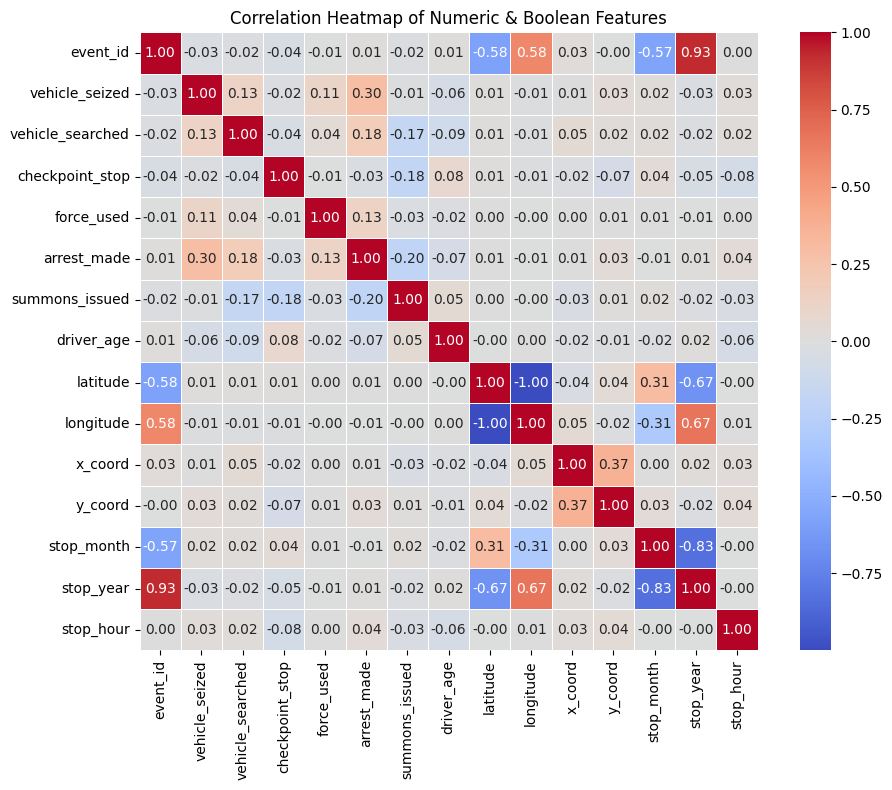

In [54]:
numeric_corr = df_cleaned.select_dtypes(include=['number', 'bool']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Correlation Heatmap of Numeric & Boolean Features")
plt.tight_layout()
plt.show()

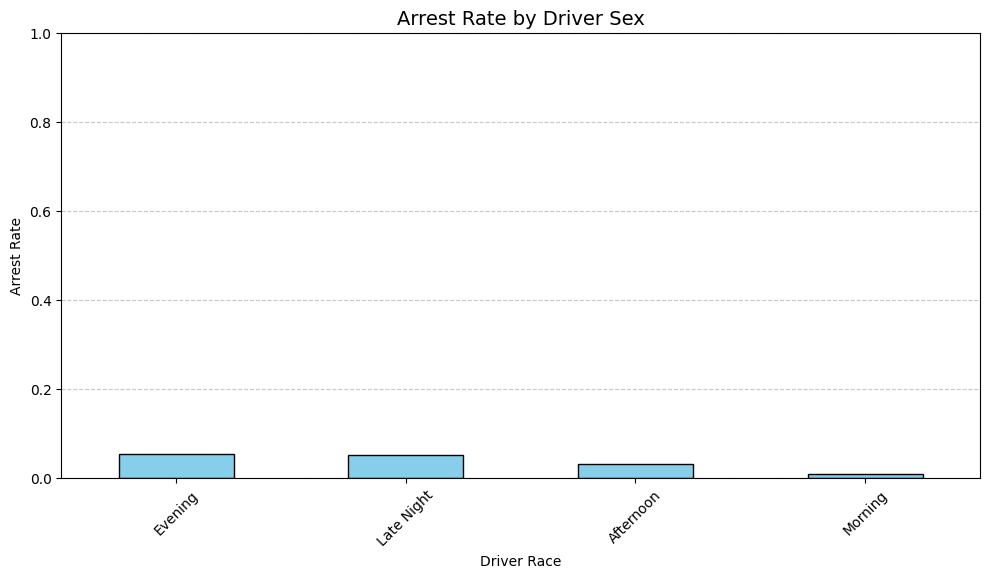

In [55]:
df_cleaned = pd.read_csv('nypd_vehicle_stops_cleaned.csv')

# Calculate arrest rate by driver race
race_arrest_stats = (
    df_cleaned.groupby("stop_time_of_day")["arrest_made"]
    .agg(["count", "sum"])
    .rename(columns={"count": "total_stops", "sum": "arrests"})
)
race_arrest_stats["arrest_rate"] = race_arrest_stats["arrests"] / race_arrest_stats["total_stops"]

# Plot
plt.figure(figsize=(10, 6))
race_arrest_stats["arrest_rate"].sort_values(ascending=False).plot(
    kind="bar", color="skyblue", edgecolor="black"
)
plt.title("Arrest Rate by Driver Sex", fontsize=14)
plt.ylabel("Arrest Rate")
plt.xlabel("Driver Race")
plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

## Data Modeling

##### New CSV of clean data

In [56]:
# Print to CSV
df_cleaned.to_csv("nypd_vehicle_stops_cleaned.csv", index=False)

# Smaller sample for github
df_cleaned_sample = df_cleaned.sample(n=10000, random_state=42)
df_cleaned_sample.to_csv("nypd_vehicle_stops_sample.csv", index=False)


In [57]:
df_clean = pd.read_csv("nypd_vehicle_stops_cleaned.csv")

In [58]:
# Identify categorical columns for one-hot encoding
categorical_cols = df_cleaned.select_dtypes(include=['object', 'category']).columns.tolist()

# Exclude columns that shouldn't be one-hot encoded (like IDs or datetime strings)
exclude_cols = ['event_id', 'stop_date', 'stop_time', 'stop_datetime']
categorical_cols = [col for col in categorical_cols if col not in exclude_cols]

# One-hot encode remaining categorical columns
df_encoded = df_cleaned.drop(columns=['stop_date', 'stop_time', 'stop_datetime'])
df_encoded = df_encoded.dropna()
df_encoded = pd.get_dummies(df_encoded, columns=categorical_cols, drop_first=True)

# Display the encoded DataFrame

# Return basic info
df_encoded


,event_id,command_code,vehicle_seized,vehicle_searched,checkpoint_stop,force_used,arrest_made,summons_issued,driver_age,latitude,...,stop_dayofweek_Sunday,stop_dayofweek_Thursday,stop_dayofweek_Tuesday,stop_dayofweek_Wednesday,stop_season_Spring,stop_season_Summer,stop_season_Winter,stop_time_of_day_Evening,stop_time_of_day_Late Night,stop_time_of_day_Morning
0,284650033,1,False,False,False,False,False,True,42.0,40.722253,...,False,False,True,False,True,False,False,False,False,True
1,284650036,5,False,False,False,False,False,True,33.0,40.718457,...,False,False,True,False,True,False,False,False,False,True
2,284650037,5,False,False,False,False,False,True,42.0,40.718457,...,False,False,True,False,True,False,False,False,False,True
3,284650038,7,False,False,False,False,False,False,49.0,40.715954,...,False,False,True,False,True,False,False,False,True,False
4,284650039,7,False,False,False,False,False,False,36.0,40.715954,...,False,False,True,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639606,304404459,83,False,False,False,False,False,True,32.0,0.000000,...,False,False,False,False,True,False,False,False,False,False
639607,304404690,109,False,False,False,False,False,False,46.0,0.000000,...,False,False,False,False,True,False,False,False,False,True
639608,304404735,110,False,False,False,False,False,False,33.0,40.757683,...,False,False,False,False,True,False,False,False,False,False
639609,304424562,47,False,False,False,False,True,False,22.0,40.893325,...,False,False,False,False,True,False,False,True,False,False


In [59]:
from sklearn.utils import resample

# Separate classes
df_majority = df_encoded[df_encoded['arrest_made'] == False]
df_minority = df_encoded[df_encoded['arrest_made'] == True]

# Upsample minority
df_majority_downsampled = resample(
    df_majority,
    replace=False,
    n_samples=len(df_minority),
    random_state=42
)

df_balanced = pd.concat([df_majority_downsampled, df_minority])

df_balanced


,event_id,command_code,vehicle_seized,vehicle_searched,checkpoint_stop,force_used,arrest_made,summons_issued,driver_age,latitude,...,stop_dayofweek_Sunday,stop_dayofweek_Thursday,stop_dayofweek_Tuesday,stop_dayofweek_Wednesday,stop_season_Spring,stop_season_Summer,stop_season_Winter,stop_time_of_day_Evening,stop_time_of_day_Late Night,stop_time_of_day_Morning
160377,288404530,46,False,False,False,False,False,True,42.0,40.861352,...,False,False,False,True,False,True,False,False,False,False
215202,289686378,114,False,False,False,False,False,True,25.0,40.753636,...,True,False,False,False,False,True,False,False,False,True
110970,287253934,70,False,False,False,False,False,False,49.0,40.630367,...,False,False,True,False,True,False,False,True,False,False
326258,293147196,62,False,False,False,False,False,False,34.0,40.605138,...,False,False,False,True,False,True,False,True,False,False
276565,291255617,114,False,False,False,False,False,False,63.0,40.754194,...,False,False,True,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639583,304137602,100,False,False,False,False,True,False,41.0,0.000000,...,False,False,False,False,True,False,False,False,False,True
639592,304213039,44,False,False,False,False,True,True,20.0,0.000000,...,False,False,False,False,True,False,False,True,False,False
639593,304213471,75,False,False,False,False,True,True,59.0,0.000000,...,False,False,False,False,True,False,False,True,False,False
639598,304287147,43,False,False,False,False,True,False,40.0,0.000000,...,False,False,False,False,True,False,False,False,False,False


In [60]:
# Print to CSV
df_balanced.to_csv("nypd_vehicle_stops_enc_balanced.csv", index=False)

df_balanced = pd.read_csv("nypd_vehicle_stops_enc_balanced.csv")


##### Train Test Split

In [61]:
X = df_balanced.drop("arrest_made", axis="columns")
X

,event_id,command_code,vehicle_seized,vehicle_searched,checkpoint_stop,force_used,summons_issued,driver_age,latitude,longitude,...,stop_dayofweek_Sunday,stop_dayofweek_Thursday,stop_dayofweek_Tuesday,stop_dayofweek_Wednesday,stop_season_Spring,stop_season_Summer,stop_season_Winter,stop_time_of_day_Evening,stop_time_of_day_Late Night,stop_time_of_day_Morning
0,288404530,46,False,False,False,False,True,42.0,40.861352,-73.897737,...,False,False,False,True,False,True,False,False,False,False
1,289686378,114,False,False,False,False,True,25.0,40.753636,-73.918923,...,True,False,False,False,False,True,False,False,False,True
2,287253934,70,False,False,False,False,False,49.0,40.630367,-73.973713,...,False,False,True,False,True,False,False,True,False,False
3,293147196,62,False,False,False,False,False,34.0,40.605138,-74.017283,...,False,False,False,True,False,True,False,True,False,False
4,291255617,114,False,False,False,False,False,63.0,40.754194,-73.900213,...,False,False,True,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33983,304137602,100,False,False,False,False,False,41.0,0.000000,0.000000,...,False,False,False,False,True,False,False,False,False,True
33984,304213039,44,False,False,False,False,True,20.0,0.000000,0.000000,...,False,False,False,False,True,False,False,True,False,False
33985,304213471,75,False,False,False,False,True,59.0,0.000000,0.000000,...,False,False,False,False,True,False,False,True,False,False
33986,304287147,43,False,False,False,False,False,40.0,0.000000,0.000000,...,False,False,False,False,True,False,False,False,False,False


In [62]:
y = df_balanced['arrest_made']
y

0        False
1        False
2        False
3        False
4        False
         ...  
33983     True
33984     True
33985     True
33986     True
33987     True
Name: arrest_made, Length: 33988, dtype: bool

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#### Logistic Regression

In [64]:
df_balanced['arrest_made'].unique()
df_balanced['arrest_made'].value_counts()


arrest_made
False    16994
True     16994
Name: count, dtype: int64

In [65]:
best_models = {}

Accuracy:  0.5727
Precision: 0.5840
Recall:    0.5163
F1 Score:  0.5481

Classification Report:

              precision    recall  f1-score   support

   No Arrest       0.56      0.63      0.59      5080
 Arrest Made       0.58      0.52      0.55      5117

    accuracy                           0.57     10197
   macro avg       0.57      0.57      0.57     10197
weighted avg       0.57      0.57      0.57     10197



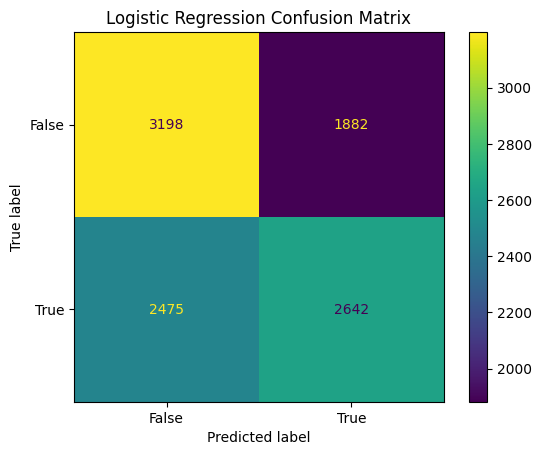

In [66]:
# Train the model
LR_model = LogisticRegression(max_iter=5000, class_weight=None)  # You can change to 'balanced' later
LR_model.fit(X_train, y_train)

# Make predictions
LR_pred = LR_model.predict(X_test)

# Evaluate metrics
LR_acc = accuracy_score(y_test, LR_pred)
LR_precision = precision_score(y_test, LR_pred, zero_division=0)
LR_recall = recall_score(y_test, LR_pred)
LR_f1 = f1_score(y_test, LR_pred)

# Store best model score (can adjust to store more later)
best_models['Logistic Regression'] = LR_acc

# Print metrics
print(f"Accuracy:  {LR_acc:.4f}")
print(f"Precision: {LR_precision:.4f}")
print(f"Recall:    {LR_recall:.4f}")
print(f"F1 Score:  {LR_f1:.4f}")

# Optional: detailed classification report
print("\nClassification Report:\n")
print(classification_report(y_test, LR_pred, target_names=['No Arrest', 'Arrest Made']))

# Confusion Matrix
cm = confusion_matrix(y_test, LR_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR_model.classes_)
disp.plot()
plt.title('Logistic Regression Confusion Matrix')
plt.show()


Accuracy:  0.8131
Precision: 0.7914
Recall:    0.8521
F1 Score:  0.8206

Classification Report:

              precision    recall  f1-score   support

   No Arrest       0.84      0.77      0.80      5080
 Arrest Made       0.79      0.85      0.82      5117

    accuracy                           0.81     10197
   macro avg       0.81      0.81      0.81     10197
weighted avg       0.81      0.81      0.81     10197



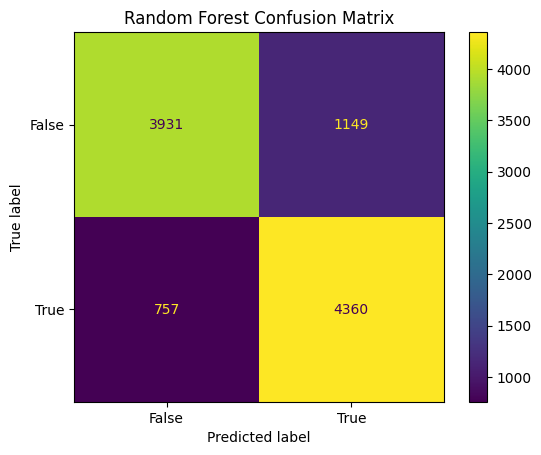

In [67]:
from sklearn.ensemble import RandomForestClassifier

# Train the model
RF_model = RandomForestClassifier(class_weight='balanced', random_state=42)
RF_model.fit(X_train, y_train)

# Make predictions
RF_pred = RF_model.predict(X_test)

# Evaluate metrics
RF_acc = accuracy_score(y_test, RF_pred)
RF_precision = precision_score(y_test, RF_pred, zero_division=0)
RF_recall = recall_score(y_test, RF_pred)
RF_f1 = f1_score(y_test, RF_pred)

# Store best model score (adjust as needed)
best_models['Random Forest'] = RF_acc

# Print metrics
print(f"Accuracy:  {RF_acc:.4f}")
print(f"Precision: {RF_precision:.4f}")
print(f"Recall:    {RF_recall:.4f}")
print(f"F1 Score:  {RF_f1:.4f}")

# Optional: detailed classification report
print("\nClassification Report:\n")
print(classification_report(y_test, RF_pred, target_names=['No Arrest', 'Arrest Made']))

# Confusion Matrix
cm = confusion_matrix(y_test, RF_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RF_model.classes_)
disp.plot()
plt.title('Random Forest Confusion Matrix')
plt.show()


/usr/local/lib/python3.10/dist-packages/xgboost/training.py:183: UserWarning: [19:45:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy:  0.8088
Precision: 0.7855
Recall:    0.8515
F1 Score:  0.8171

Classification Report:

              precision    recall  f1-score   support

   No Arrest       0.84      0.77      0.80      5080
 Arrest Made       0.79      0.85      0.82      5117

    accuracy                           0.81     10197
   macro avg       0.81      0.81      0.81     10197
weighted avg       0.81      0.81      0.81     10197



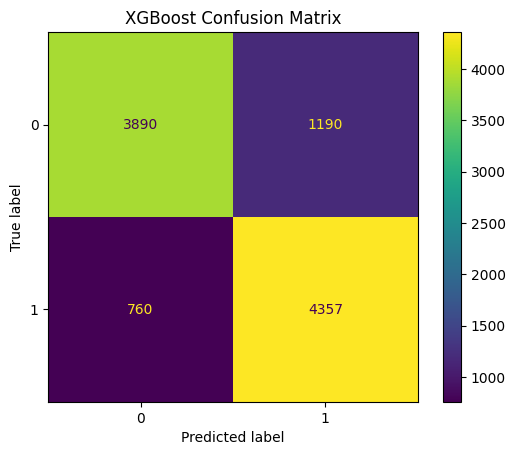

In [68]:
from xgboost import XGBClassifier

# Calculate class imbalance weight
scale = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# Train the model
XGB_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=scale, random_state=42)
XGB_model.fit(X_train, y_train)

# Make predictions
XGB_pred = XGB_model.predict(X_test)

# Evaluate metrics
XGB_acc = accuracy_score(y_test, XGB_pred)
XGB_precision = precision_score(y_test, XGB_pred, zero_division=0)
XGB_recall = recall_score(y_test, XGB_pred)
XGB_f1 = f1_score(y_test, XGB_pred)

# Store best model score
best_models['XGBoost'] = XGB_acc

# Print metrics
print(f"Accuracy:  {XGB_acc:.4f}")
print(f"Precision: {XGB_precision:.4f}")
print(f"Recall:    {XGB_recall:.4f}")
print(f"F1 Score:  {XGB_f1:.4f}")

# Optional: detailed classification report
print("\nClassification Report:\n")
print(classification_report(y_test, XGB_pred, target_names=['No Arrest', 'Arrest Made']))

# Confusion Matrix
cm = confusion_matrix(y_test, XGB_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=XGB_model.classes_)
disp.plot()
plt.title('XGBoost Confusion Matrix')
plt.show()


/usr/local/lib/python3.10/dist-packages/xgboost/training.py:183: UserWarning: [19:45:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy:  0.8088
Precision: 0.7855
Recall:    0.8515
F1 Score:  0.8171

Classification Report:

              precision    recall  f1-score   support

   No Arrest       0.84      0.77      0.80      5080
 Arrest Made       0.79      0.85      0.82      5117

    accuracy                           0.81     10197
   macro avg       0.81      0.81      0.81     10197
weighted avg       0.81      0.81      0.81     10197



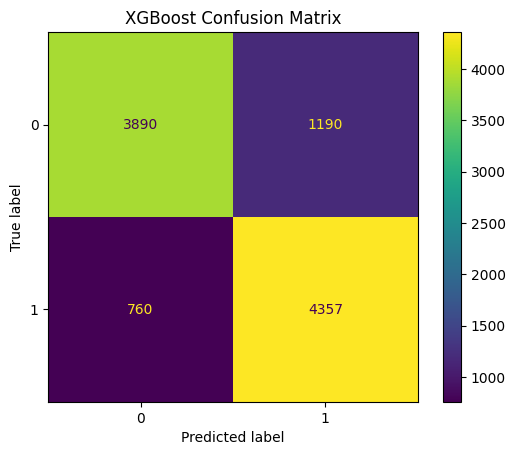

In [69]:
from xgboost import XGBClassifier

# Calculate class imbalance weight
scale = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# Train the model
XGB_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=scale, random_state=42)
XGB_model.fit(X_train, y_train)

# Make predictions
XGB_pred = XGB_model.predict(X_test)

# Evaluate metrics
XGB_acc = accuracy_score(y_test, XGB_pred)
XGB_precision = precision_score(y_test, XGB_pred, zero_division=0)
XGB_recall = recall_score(y_test, XGB_pred)
XGB_f1 = f1_score(y_test, XGB_pred)

# Store best model score
best_models['XGBoost'] = XGB_acc

# Print metrics
print(f"Accuracy:  {XGB_acc:.4f}")
print(f"Precision: {XGB_precision:.4f}")
print(f"Recall:    {XGB_recall:.4f}")
print(f"F1 Score:  {XGB_f1:.4f}")

# Optional: detailed classification report
print("\nClassification Report:\n")
print(classification_report(y_test, XGB_pred, target_names=['No Arrest', 'Arrest Made']))

# Confusion Matrix
cm = confusion_matrix(y_test, XGB_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=XGB_model.classes_)
disp.plot()
plt.title('XGBoost Confusion Matrix')
plt.show()


Accuracy:  0.5018
Precision: 0.5018
Recall:    1.0000
F1 Score:  0.6683

Classification Report:

              precision    recall  f1-score   support

   No Arrest       0.00      0.00      0.00      5080
 Arrest Made       0.50      1.00      0.67      5117

    accuracy                           0.50     10197
   macro avg       0.25      0.50      0.33     10197
weighted avg       0.25      0.50      0.34     10197



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


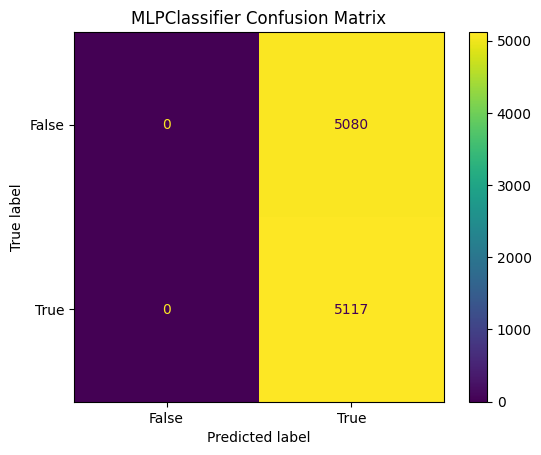

In [70]:
from sklearn.neural_network import MLPClassifier

MLP_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
MLP_model.fit(X_train, y_train)

MLP_pred = MLP_model.predict(X_test)

MLP_acc = accuracy_score(y_test, MLP_pred)
MLP_precision = precision_score(y_test, MLP_pred, zero_division=0)
MLP_recall = recall_score(y_test, MLP_pred)
MLP_f1 = f1_score(y_test, MLP_pred)

best_models['MLPClassifier'] = MLP_acc

print(f"Accuracy:  {MLP_acc:.4f}")
print(f"Precision: {MLP_precision:.4f}")
print(f"Recall:    {MLP_recall:.4f}")
print(f"F1 Score:  {MLP_f1:.4f}")

print("\nClassification Report:\n")
print(classification_report(y_test, MLP_pred, target_names=['No Arrest', 'Arrest Made']))

cm = confusion_matrix(y_test, MLP_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=MLP_model.classes_)
disp.plot()
plt.title('MLPClassifier Confusion Matrix')
plt.show()


Accuracy:  0.5839
Precision: 0.5852
Recall:    0.5865
F1 Score:  0.5858

Classification Report:

              precision    recall  f1-score   support

   No Arrest       0.58      0.58      0.58      5080
 Arrest Made       0.59      0.59      0.59      5117

    accuracy                           0.58     10197
   macro avg       0.58      0.58      0.58     10197
weighted avg       0.58      0.58      0.58     10197



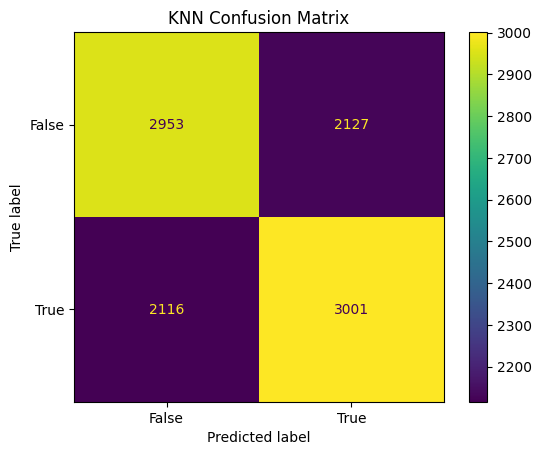

In [71]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train, y_train)

KNN_pred = KNN_model.predict(X_test)

KNN_acc = accuracy_score(y_test, KNN_pred)
KNN_precision = precision_score(y_test, KNN_pred, zero_division=0)
KNN_recall = recall_score(y_test, KNN_pred)
KNN_f1 = f1_score(y_test, KNN_pred)

best_models['KNN'] = KNN_acc

print(f"Accuracy:  {KNN_acc:.4f}")
print(f"Precision: {KNN_precision:.4f}")
print(f"Recall:    {KNN_recall:.4f}")
print(f"F1 Score:  {KNN_f1:.4f}")

print("\nClassification Report:\n")
print(classification_report(y_test, KNN_pred, target_names=['No Arrest', 'Arrest Made']))

cm = confusion_matrix(y_test, KNN_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=KNN_model.classes_)
disp.plot()
plt.title('KNN Confusion Matrix')
plt.show()


Accuracy:  0.7394
Precision: 0.7443
Recall:    0.7323
F1 Score:  0.7383

Classification Report:

              precision    recall  f1-score   support

   No Arrest       0.73      0.75      0.74      5080
 Arrest Made       0.74      0.73      0.74      5117

    accuracy                           0.74     10197
   macro avg       0.74      0.74      0.74     10197
weighted avg       0.74      0.74      0.74     10197



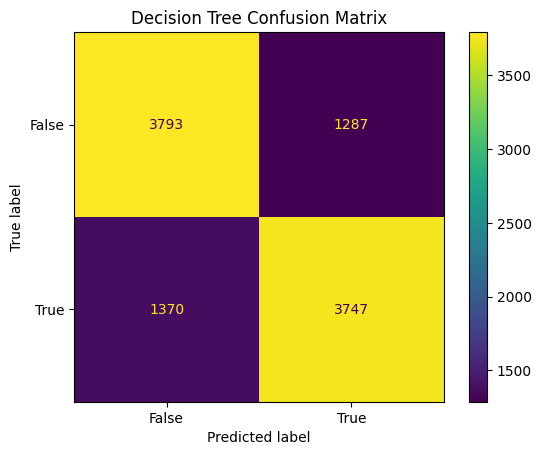

In [72]:
from sklearn.tree import DecisionTreeClassifier

DT_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
DT_model.fit(X_train, y_train)

DT_pred = DT_model.predict(X_test)

DT_acc = accuracy_score(y_test, DT_pred)
DT_precision = precision_score(y_test, DT_pred, zero_division=0)
DT_recall = recall_score(y_test, DT_pred)
DT_f1 = f1_score(y_test, DT_pred)

best_models['Decision Tree'] = DT_acc

print(f"Accuracy:  {DT_acc:.4f}")
print(f"Precision: {DT_precision:.4f}")
print(f"Recall:    {DT_recall:.4f}")
print(f"F1 Score:  {DT_f1:.4f}")

print("\nClassification Report:\n")
print(classification_report(y_test, DT_pred, target_names=['No Arrest', 'Arrest Made']))

cm = confusion_matrix(y_test, DT_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=DT_model.classes_)
disp.plot()
plt.title('Decision Tree Confusion Matrix')
plt.show()


In [73]:
# from sklearn.svm import SVC

# SVC_model = SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42)
# SVC_model.fit(X_train, y_train)

# SVC_pred = SVC_model.predict(X_test)

# SVC_acc = accuracy_score(y_test, SVC_pred)
# SVC_precision = precision_score(y_test, SVC_pred, zero_division=0)
# SVC_recall = recall_score(y_test, SVC_pred)
# SVC_f1 = f1_score(y_test, SVC_pred)

# best_models['SVC'] = SVC_acc

# print(f"Accuracy:  {SVC_acc:.4f}")
# print(f"Precision: {SVC_precision:.4f}")
# print(f"Recall:    {SVC_recall:.4f}")
# print(f"F1 Score:  {SVC_f1:.4f}")

# print("\nClassification Report:\n")
# print(classification_report(y_test, SVC_pred, target_names=['No Arrest', 'Arrest Made']))

# cm = confusion_matrix(y_test, SVC_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=SVC_model.classes_)
# disp.plot()
# plt.title('SVC Confusion Matrix')
# plt.show()


Accuracy:  0.8060
Precision: 0.7791
Recall:    0.8562
F1 Score:  0.8158

Classification Report:

              precision    recall  f1-score   support

   No Arrest       0.84      0.76      0.80      5080
 Arrest Made       0.78      0.86      0.82      5117

    accuracy                           0.81     10197
   macro avg       0.81      0.81      0.81     10197
weighted avg       0.81      0.81      0.81     10197



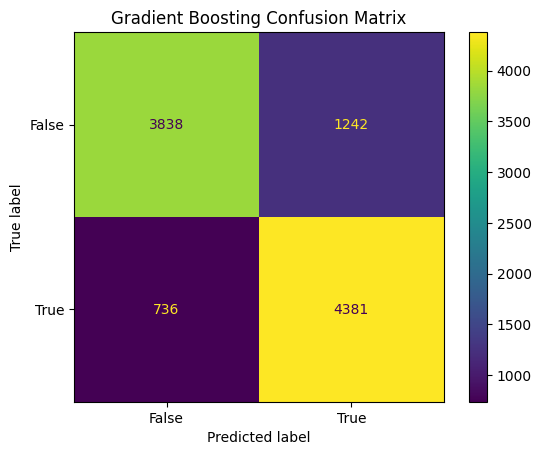

In [74]:
from sklearn.ensemble import GradientBoostingClassifier

GB_model = GradientBoostingClassifier(random_state=42)
GB_model.fit(X_train, y_train)

GB_pred = GB_model.predict(X_test)

GB_acc = accuracy_score(y_test, GB_pred)
GB_precision = precision_score(y_test, GB_pred, zero_division=0)
GB_recall = recall_score(y_test, GB_pred)
GB_f1 = f1_score(y_test, GB_pred)

best_models['Gradient Boosting'] = GB_acc

print(f"Accuracy:  {GB_acc:.4f}")
print(f"Precision: {GB_precision:.4f}")
print(f"Recall:    {GB_recall:.4f}")
print(f"F1 Score:  {GB_f1:.4f}")

print("\nClassification Report:\n")
print(classification_report(y_test, GB_pred, target_names=['No Arrest', 'Arrest Made']))

cm = confusion_matrix(y_test, GB_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=GB_model.classes_)
disp.plot()
plt.title('Gradient Boosting Confusion Matrix')
plt.show()
